author: @SteveEckel

Thus script tests the various functionalities of the basic Zeeman hamiltonian
contained in the pylcp package.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cts
from pylcp import hamiltonians
from pylcp.atom import atom

[[ 2. -2.]
 [ 2. -1.]
 [ 2.  0.]
 [ 2.  1.]
 [ 2.  2.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.         -1.41421356  0.          0.          0.        ]
 [ 0.          0.         -1.73205081  0.          0.        ]
 [ 0.          0.          0.         -1.73205081  0.        ]
 [ 0.          0.          0.          0.         -1.41421356]
 [ 0.          0.          0.          0.          0.        ]]
[[ 2.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -2.]]
[[0.         0.         0.         0.         0.        ]
 [1.41421356 0.         0.         0.         0.        ]
 [0.         1.73205081 0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.        ]
 [0.         0.         0.         1.41421356 0.        ]]
[-18.  -9.   0.   9.  18.] [[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0

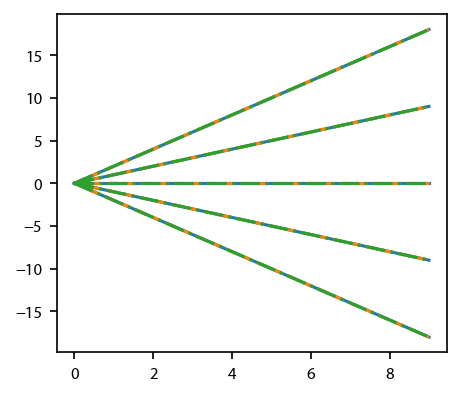

In [2]:
# %% Make the Hamiltonian:
F = 2
H_0, H_Bq, basis = hamiltonians.singleF(F, muB=1, return_basis=True)

print(basis)
print(H_0)
print(H_Bq[0])
print(H_Bq[1])
print(H_Bq[2])

# %% Diagonalize the Hamiltonian:
B = np.arange(10)
Es_x = np.zeros((B.size, 2*F+1))
Es_y = np.zeros((B.size, 2*F+1))
Es_z = np.zeros((B.size, 2*F+1))

Bq_x = np.zeros((3,),dtype='complex128')
Bq_y = np.zeros((3,),dtype='complex128')
Bq_z = np.zeros((3,),dtype='complex128')

Bq_z[1] = 1

Bq_x[0] = -1/np.sqrt(2)
Bq_x[1] = 0
Bq_x[2] = 1/np.sqrt(2)

Bq_y[0] = +1j/np.sqrt(2)
Bq_y[1] = 0
Bq_y[2] = -1j/np.sqrt(2)

for ii,Bi in enumerate(B):
    Es_x[ii, :], Vecs_x = np.linalg.eigh(
        H_0 + Bi*np.tensordot(Bq_x[::-1],H_Bq,axes=(0,0))
        )
    Es_y[ii, :], Vecs_y = np.linalg.eigh(
        H_0 + Bi*np.tensordot(Bq_x[::-1],H_Bq,axes=(0,0))
        )
    Es_z[ii, :], Vecs_z = np.linalg.eigh(
        H_0 + Bi*np.tensordot(Bq_z[::-1],H_Bq,axes=(0,0))
        )
    
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(B,Es_z,color='C0')
ax.plot(B,Es_x,'--',color='C1')
ax.plot(B,Es_y,'-.',color='C2')

print(Es_z[-1,:],Vecs_z)